## Part 1: Exploratory Data Analysis – Login Activity Patterns

### Objective:
The goal is to analyze login timestamp data from the `logins.json` file to understand user behavior, identify patterns in demand, and detect any potential cyclic trends.

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [3]:
login_times = pd.read_json('logins.json')


In [5]:
login_times.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [9]:
login_times.tail()

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


In [11]:
login_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [13]:
# Time Series Aggregation and Visualization
#  Aggregate Logins into 15-Minute Buckets
# Resample into 15-minute bins
# Use '15min' instead of '15T'
login_times.reset_index(inplace=True)
login_times.set_index('login_time', inplace=True)
login_counts = login_times.resample('15min').size()


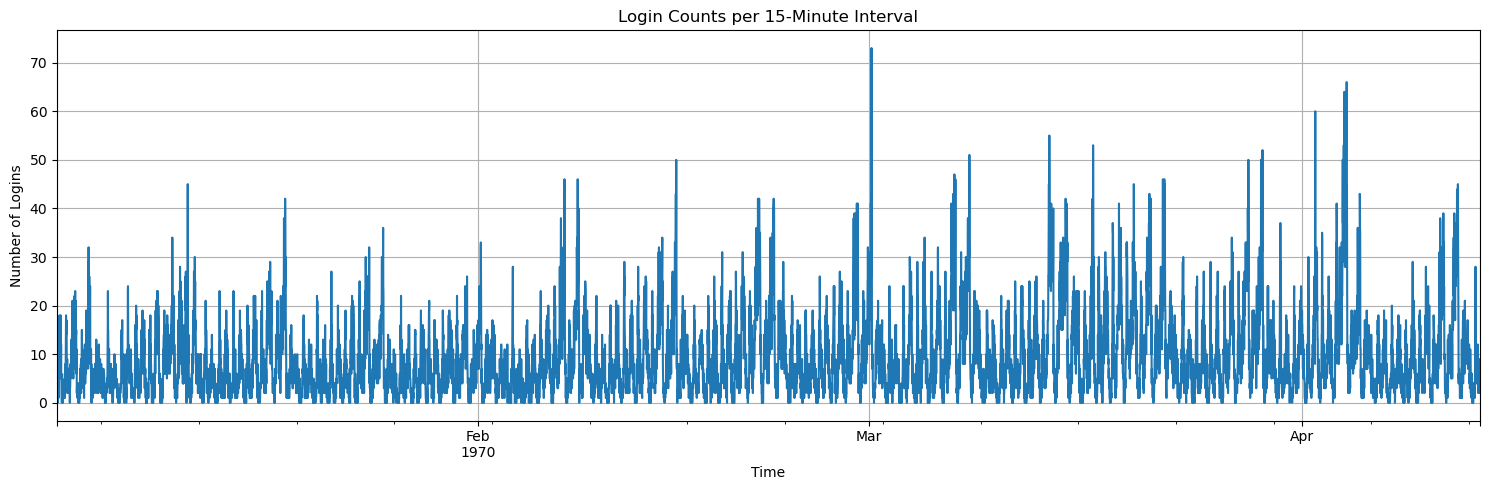

In [15]:
plt.figure(figsize=(15, 5))
login_counts.plot()
plt.title("Login Counts per 15-Minute Interval")
plt.xlabel("Time")
plt.ylabel("Number of Logins")
plt.grid(True)
plt.tight_layout()
plt.show()



### Data Overview:
- The dataset contains **93,142 login timestamps** spanning from **January to April 1970**.
- The `login_time` column was parsed as a datetime object and used to index the time series.

---

### Step 1: Resampling into 15-Minute Intervals
We aggregated the number of login events into **15-minute buckets** to better observe temporal patterns and reduce noise.



In [17]:
# Add Hour and Day of Week for Pattern Detection
# Convert to DataFrame and extract time-based features
login_df = login_counts.to_frame(name='logins')
login_df['hour'] = login_df.index.hour
login_df['day_of_week'] = login_df.index.dayofweek  # Monday=0, Sunday=6


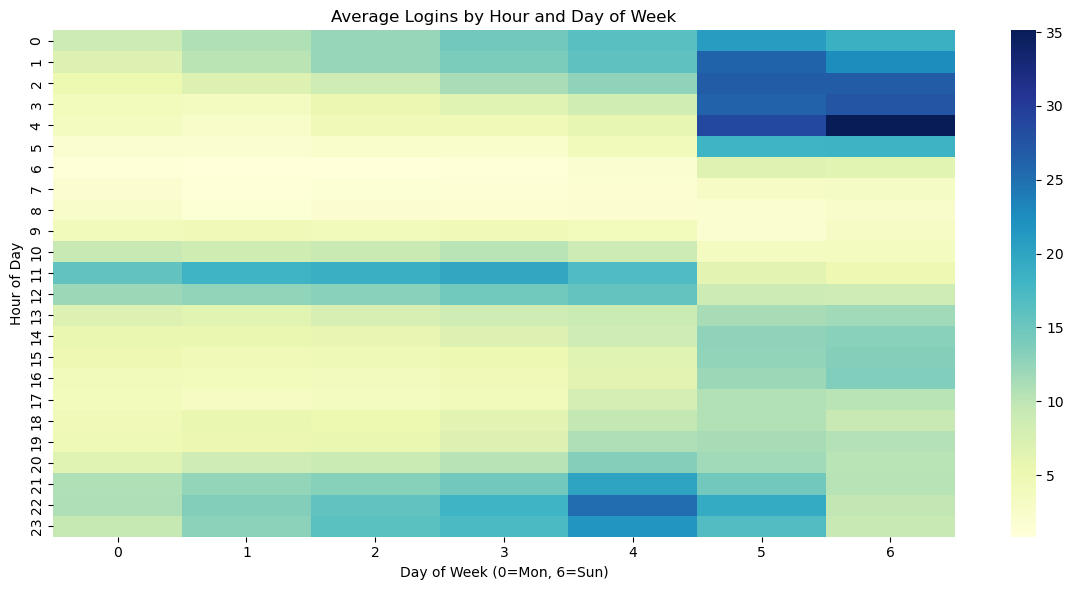

In [19]:
# Create a Heatmap of Logins by Hour and Day

import seaborn as sns

# Average logins by hour and day of week
pivot_table = login_df.groupby(['hour', 'day_of_week'])['logins'].mean().unstack()

# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title("Average Logins by Hour and Day of Week")
plt.xlabel("Day of Week (0=Mon, 6=Sun)")
plt.ylabel("Hour of Day")
plt.tight_layout()
plt.show()


### Heatmap: Average Logins by Hour and Day of Week

To uncover temporal patterns in user login activity, we generated a heatmap showing the **average number of logins** per hour for each **day of the week**.

#### Key Findings:
-  **Peak login activity occurs between 20:00 and 03:00**, especially on **Fridays (day 4) and Saturdays (day 5)**.
-  **Early mornings (around 5:00 to 9:00)** across all days consistently show **low usage**, indicating reduced engagement.
-  The pattern suggests **nocturnal user behavior**, possibly aligned with entertainment or late-night service usage.

- This graph highlights **strong cyclical demand** driven by the day of the week and hour of day.
- These insights can guide:
  - **Server load management**
  - **Marketing campaign timing**
  - **Feature releases or A/B tests scheduling**

Overall, the heatmap confirms that user behavior exhibits **consistent and predictable weekly rhythms** with concentrated activity during weekend evenings.


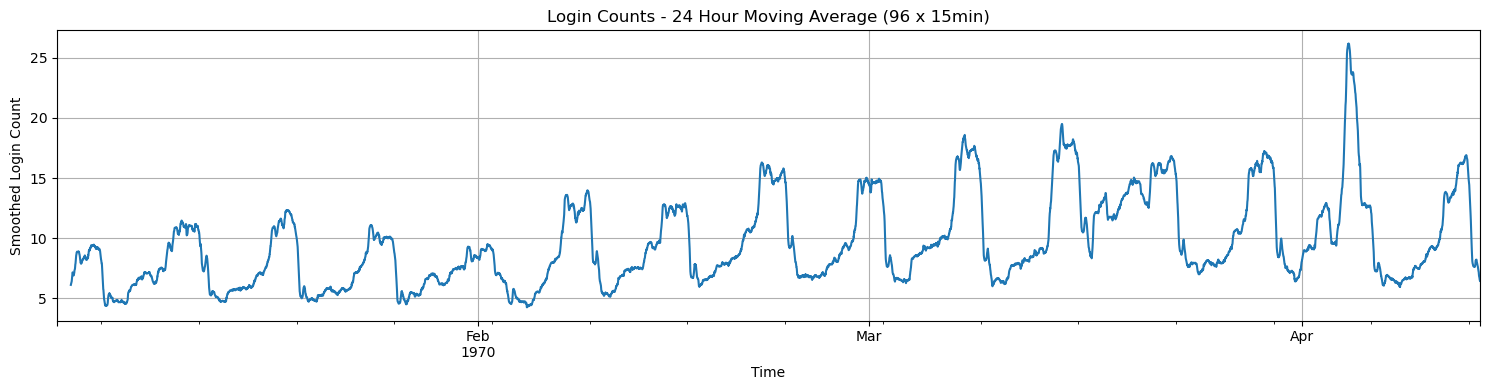

In [21]:
login_counts.rolling(window=96).mean().plot(figsize=(15, 4))
plt.title("Login Counts - 24 Hour Moving Average (96 x 15min)")
plt.xlabel("Time")
plt.ylabel("Smoothed Login Count")
plt.grid(True)
plt.tight_layout()
plt.show()


###  24-Hour Moving Average of Logins

To smooth out short-term fluctuations and highlight longer-term trends, we applied a **rolling mean** with a window of 96 (representing one day of 15-minute intervals).

#### Observations:
- Regular **daily peaks and troughs** confirm strong **circadian cycles**.
- Spikes align with evening/night activity observed in previous visualizations.
- The smoothed trend helps reveal **macro patterns** in user demand over time.


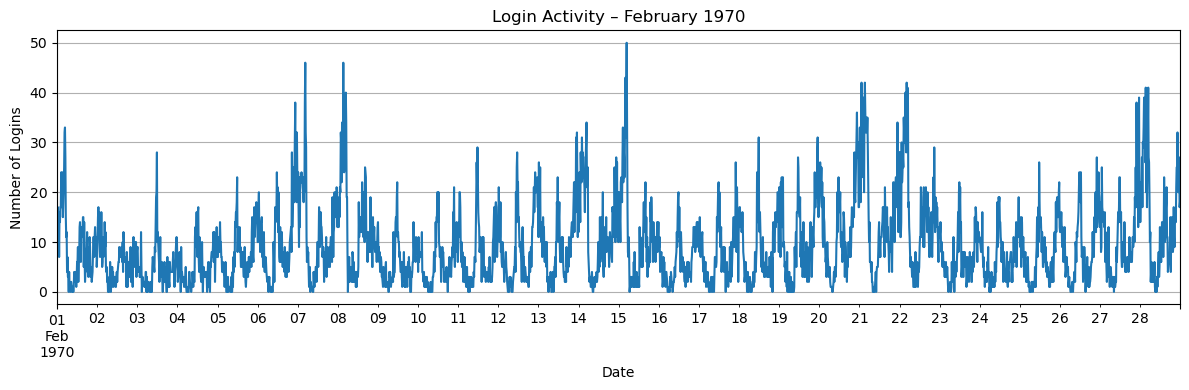

In [23]:
login_counts.loc['1970-02'].plot(figsize=(12, 4))
plt.title("Login Activity – February 1970")
plt.xlabel("Date")
plt.ylabel("Number of Logins")
plt.grid(True)
plt.tight_layout()
plt.show()


###  Login Activity – February 1970

This time series plot shows the number of logins in 15-minute intervals during **February 1970**.

#### Observations:
- Daily peaks and troughs are clearly visible, reinforcing strong **day–night usage cycles**.
- Consistent spikes in the evening suggest higher demand during late hours across most days.
- February maintains the same cyclic pattern seen across the full dataset but at a more granular, month-level view.


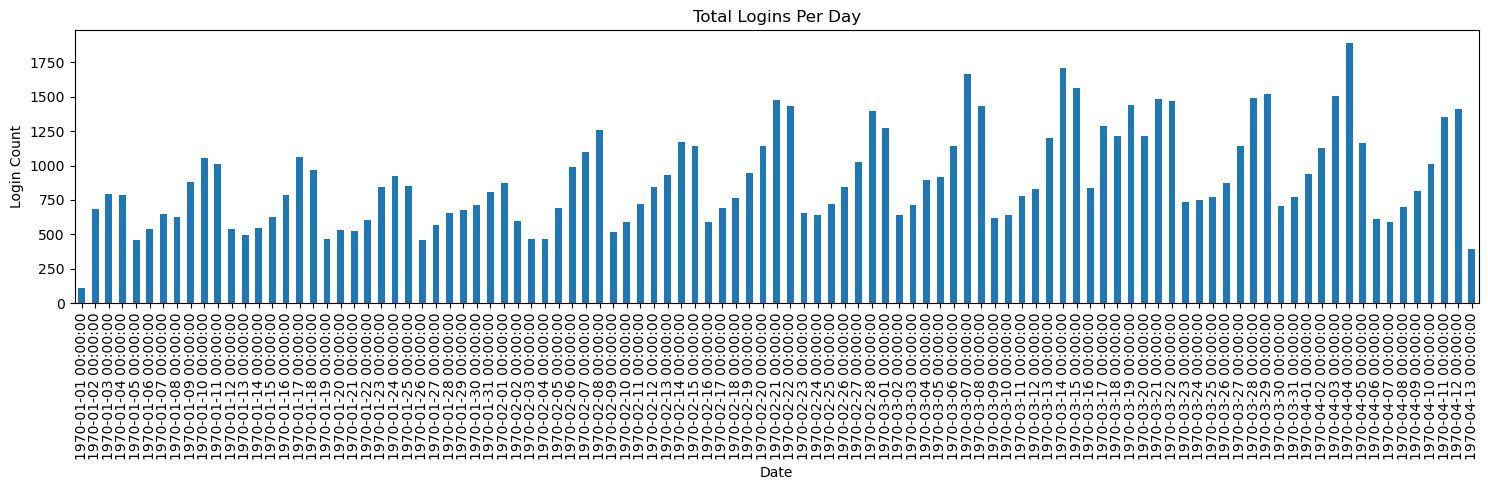

In [25]:
# Daily Total Logins Bar Plot
daily_counts = login_counts.resample('D').sum()
daily_counts.plot(kind='bar', figsize=(15, 5))
plt.title("Total Logins Per Day")
plt.xlabel("Date")
plt.ylabel("Login Count")
plt.tight_layout()
plt.show()


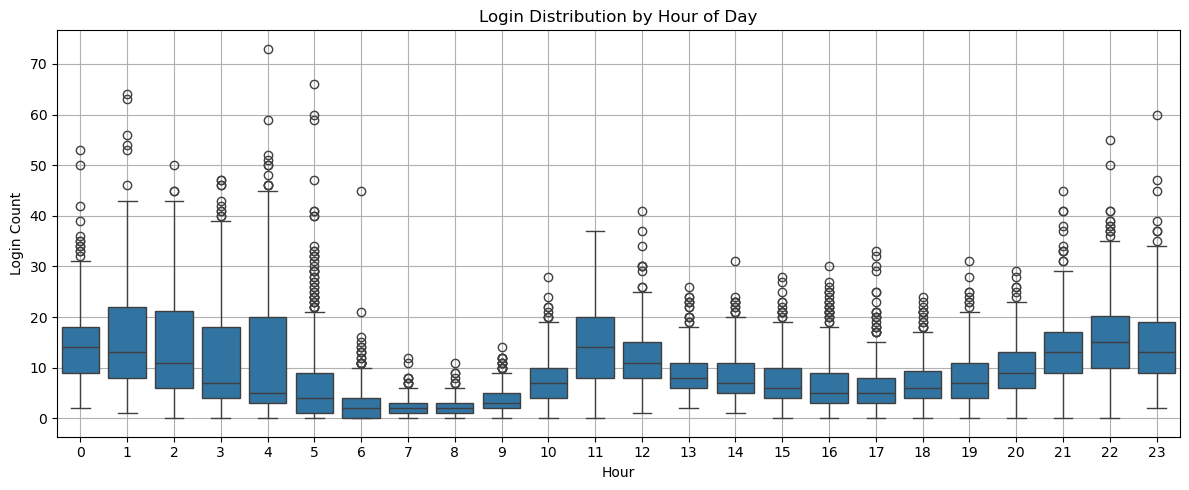

In [27]:
# Boxplot by Hour of Day

import seaborn as sns

login_df = login_counts.to_frame(name='logins')
login_df['hour'] = login_df.index.hour
plt.figure(figsize=(12, 5))
sns.boxplot(x='hour', y='logins', data=login_df)
plt.title("Login Distribution by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Login Count")
plt.grid(True)
plt.tight_layout()
plt.show()


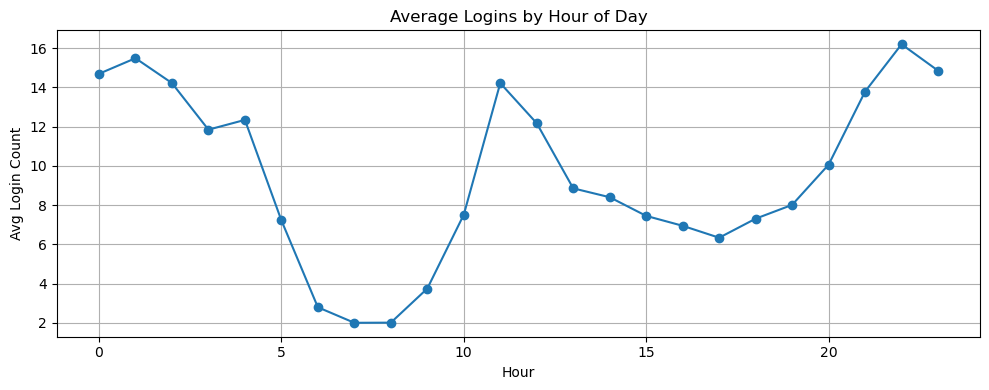

In [29]:
# Line Plot: Average Logins by Hour Across All Days
avg_hourly = login_df.groupby('hour')['logins'].mean()
avg_hourly.plot(kind='line', marker='o', figsize=(10, 4))
plt.title("Average Logins by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Avg Login Count")
plt.grid(True)
plt.tight_layout()
plt.show()


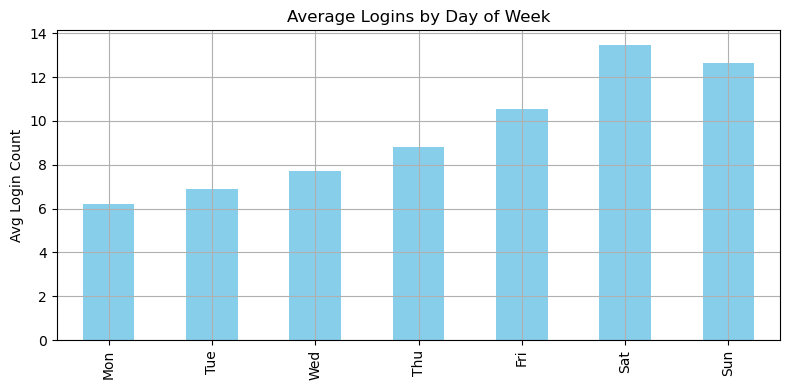

In [31]:
# Weekly Pattern (by Day of Week)
login_df['day_of_week'] = login_df.index.dayofweek
avg_weekly = login_df.groupby('day_of_week')['logins'].mean()
avg_weekly.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
avg_weekly.plot(kind='bar', color='skyblue', figsize=(8, 4))
plt.title("Average Logins by Day of Week")
plt.ylabel("Avg Login Count")
plt.grid(True)
plt.tight_layout()
plt.show()


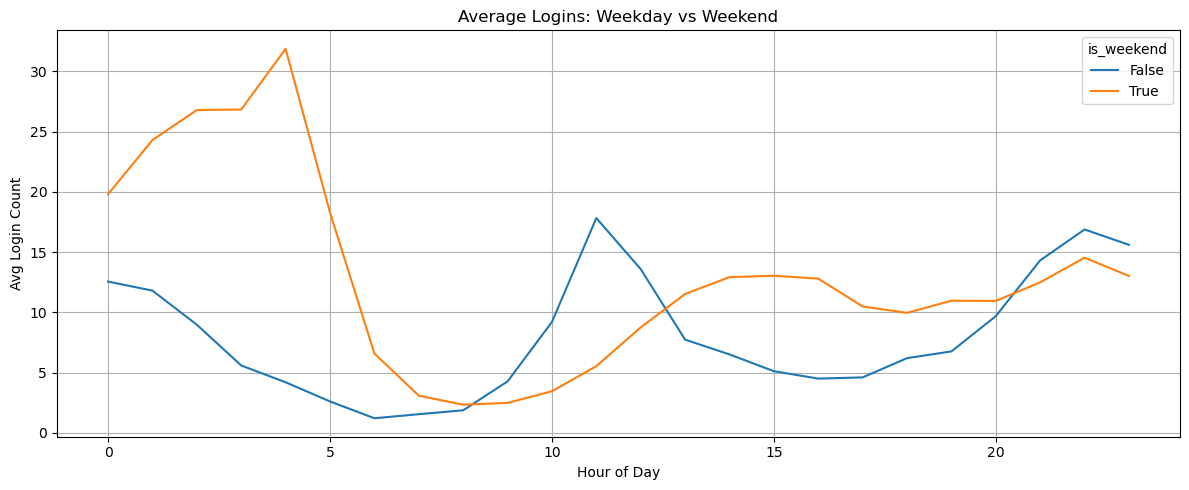

In [33]:
# Hourly vs. Weekend Trend Comparison

login_df['is_weekend'] = login_df.index.dayofweek >= 5
avg_by_hour_type = login_df.groupby(['hour', 'is_weekend'])['logins'].mean().unstack()

avg_by_hour_type.plot(figsize=(12, 5), title="Average Logins: Weekday vs Weekend")
plt.xlabel("Hour of Day")
plt.ylabel("Avg Login Count")
plt.grid(True)
plt.tight_layout()
plt.show()


Hourly vs. Weekend Login Trends

- We analyzed average login counts by hour, comparing weekdays (blue) and weekends (orange):

- Weekend logins peak between 12 AM – 5 AM, then drop and stay flat—suggesting late-night usage.

- Weekday logins are lower in the early morning, with peaks around 9 AM and 6–9 PM, likely tied to commute times.

These patterns highlight how user activity varies by day and time, which can guide marketing, staffing, and feature deployment.

Conclusion: Login activity shows strong daily cycles, with peak usage on weekend nights and weekday evenings. This insight can help optimize staffing and engagement strategies.